사실 어떤 모델을 쓰든 코드는 비슷비슷하기 떄문에 프로세스에서는 중요하지 않다.

**중요한것은 데이터에 집중하는 것**

# 앙상블 기법
- 여러개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법

1. Voting
- 여러 분류기를 돌리고 다수결의 원칙으로 결정하는 것
- 전체 데이터 셋에서 여러 분류기를 돌림

2. Bagging
- 전체 데이터 셋을 샘플링 한 다음 동일한 알고리즘(보통 Decision Tree)을 여러개 돌린다
- 대표적인 방법으로 랜덤포레스트가 있다. 속도가 정말 빠르고,높은 성능을 보여주고 있음.
- 랜덤포레스트는 붓스트랩핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트 보팅으로 최종 예측 결론을 얻는다

---

# HAR (Human Activity Recognition)
- 사람 행동 예측 
- 영상이 아니라 센서 데이터를 이용하여 머신러닝으로 예측

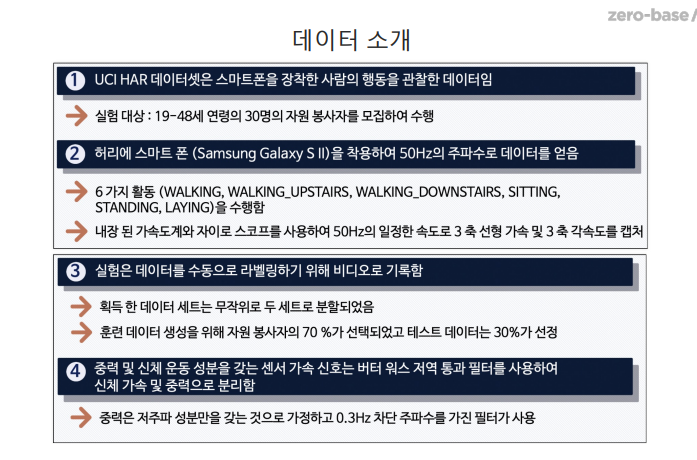 

***번외 : 데이터 사이언티스트 현업자들은 분야별로 고르게 있다. 그러니까 그들 분야에 과적합 되어
머신러닝을 사용하고 있기 때문에 이 사실을 이해한 채로 만나면 좋다.***

- 자원 봉사자들로부터 모은 행동 데이터들을 시간영역과 주파수 영역으로 
특성을 나누어 평균,중위값 등의 데이터를 었었다.
- 이를 활용해 머신러닝 진행

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+',header=None, names=['column_index', 'column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
#561개의 특성들...
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [6]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

일단 x 데이터 가져와서 채우기

In [16]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url,sep='\s+', header=None)
X_test = pd.read_csv(X_test_url,sep='\s+', header=None)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [17]:
X_train.columns = feature_name
X_test.columns = feature_name

In [18]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [19]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url,sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url,sep='\s+', header=None, names=['action'])

In [20]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [21]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


각 동작들 데이터의 분포 

In [22]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

결정나무

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13,max_depth=4)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [24]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8096369189005769

max_depth를 다양하게 하기 위해 GridSearchCV 사용

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

In [26]:
#이부분 kfold랑 복습필요
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, return_train_score=True)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [27]:
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

이건 test데이터에 대한 스코어가 아니라 validation데이터에 대한 스코어다

max_depth가 8일떄 가장 좋다고 하니 굳이 depth를 높게해서 더 테스트할 필요가 없음

In [28]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [29]:
cv_result_df=cv_result_df[['param_max_depth','mean_test_score','mean_train_score']]

In [30]:
cv_result_df

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


max_depth 8의 train과 test score에 차이가 있다. 과적합 의심할 만함.

In [31]:
max_depth = [6,8,10,12,16,20,24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train,y_train)
    
    pred = dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)

    print('max_depth:', depth, 'accuracy :',accuracy)

max_depth: 6 accuracy : 0.8554462164913471
max_depth: 8 accuracy : 0.8734306073973532
max_depth: 10 accuracy : 0.8615541228367831
max_depth: 12 accuracy : 0.8595181540549711
max_depth: 16 accuracy : 0.8669833729216152
max_depth: 20 accuracy : 0.8652867322701052
max_depth: 24 accuracy : 0.8652867322701052


test데이터에 대해서도 depth 8일때가 가장 좋음

In [32]:
#GridSearchCV를 이용해서도 확인가능
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy_score(y_test,pred1)


0.8734306073973532

랜덤포레스트

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200], #나무 몇그루 쓸것인지?
    'min_samples_leaf' : [8,12], #마지막에 분할된 곳에 최소 데이터를 몇개로 지정할 것인지?
    'min_samples_split' : [8,12] #분할 기준에서 최소 데이터를 몇개로 지정할 것인지?
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [35]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [36]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_result_df[target_col].sort_values(by='rank_test_score').head() 

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [37]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [38]:
grid_cv.best_score_

0.9151251360174102

In [39]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train,y_train)

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [40]:
#test 데이터에 대한 스코어
pred = rf_clf_best.predict(X_test)
accuracy_score(y_test,pred)

0.9205972175093315

랜덤포레스트가 성능이 더 좋음

## 중요 특성 확인

In [44]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]

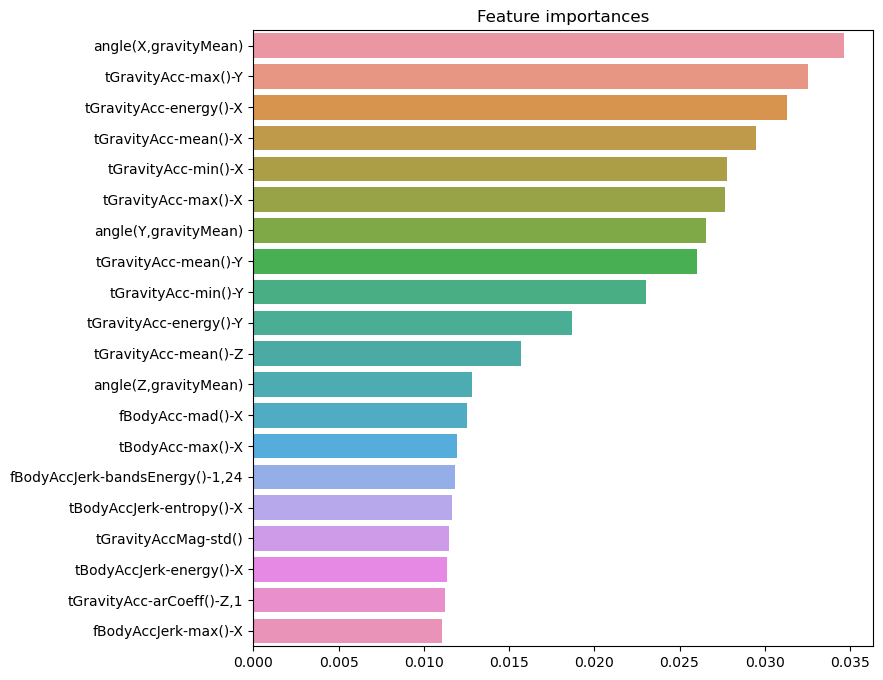

In [47]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.title('Feature importances')
plt.show()

수치들을 보니 굳이 561개의 특성을 전부 사용할 필요가 없을것 같다

20개 특성만 가지고 다시 성능 확인

In [48]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [49]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re,y_train.values.reshape(-1,))

pred_re = rf_clf_best_re.predict(X_test_re)
accuracy_score(y_test,pred_re)

0.8177807940278249

20개의 특성만 보면 연산속도가 정말 빠를것이지만 acc 스코어는 떨어진다.

우리는 2개의 제안을 할 수 있다. 
- 561개의 특성을 다 써서 높은 성능의 모델을 가져갈 것인가
- 혹은 20개 특성으로 줄여서 속도를 빠르게 하지만 성능은 조금 떨어지는 쪽으로 갈 것인가